### Из изменений в сравнении с NeuralNetwork_8 // короткое diff-содержание .ipynb
1. Начата разработка функции def get_test из модуля neural_network.py
2. Начата разработка функции def get_res (def get_diff из модуля neural_network.py)
3. Код с созданием df_for_train_ - часть кода def create_train_df_from_diff из модуля neural_network.py
4. Начата разработка функции def save_to_db из модуля tools.py
5. Сохраняется БД train.db

In [20]:
import pandas as pd
import os
import sqlite3

In [21]:
N = 9

project_dir_path = os.environ["NIR_1_sem_magistracy"]
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)
name_db = 'Aleksashina_Керов_Андрей'
db_file = f"{name_db}.db"
db_path = os.path.join(db_dir_path, db_file)

In [22]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [23]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [24]:
df.index = df['Index_']

In [25]:
df.columns[2:11]

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted',
       'Valence', 'Arousal'],
      dtype='object')

In [26]:
def get_test(n=None):
    if n is None:
        test = df[df.columns[2:11]]
    else:
        test = df[df.columns[2:11]].iloc[n:n+1]
    columns = df.columns[2:11]
    for field in columns:
        test[field] = test[field].apply(lambda x: float(x))
    return test

In [27]:
test = get_test()
test

/tmp/ipykernel_44276/2386680622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[field] = test[field].apply(lambda x: float(x))


,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [28]:
test[:10]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.2475
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.2475
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.2475
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.2475
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.2475
00:00:00.151_Керов Андрей_3,0.988123,0.003530,0.008075,0.001590,0.007836,0.000123,0.000127,-0.004546,0.2475
00:00:00.181_Керов Андрей_3,0.988241,0.003529,0.007949,0.001532,0.007893,0.000133,0.000123,-0.004420,0.2475
00:00:00.212_Керов Андрей_3,0.988391,0.003517,0.007802,0.001472,0.007936,0.000142,0.000119,-0.004285,0.2475
00:00:00.242_Керов Андрей_3,0.988538,0.003493,0.007647,0.001410,0.008018,0.000152,0.000115,-0.004154,0.2475


In [29]:
for_train = []

In [30]:
n = 200

In [31]:
# код с моделями layer взят из NeuralNetwork_11_first_layer_tests
dir_model = 'saved_models'
layer = 'first'
path_dir_model = os.path.join(project_dir_path, dir_model, layer, '_1')
print(path_dir_model)
saved_models = list(os.walk(path_dir_model))[0]
save_name = f'model_{layer}_{N}'
path = os.path.join(path_dir_model, save_name)
path

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1


'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_9'

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model = load_model(path)

In [34]:
def get_res(test):
    res = pd.DataFrame(model.predict(test[['Valence', 'Arousal']].values))
    res_values = res.values
    res_values -= test[df.columns[2:9]].values
    res = pd.DataFrame(res_values)
    res.columns = df.columns[2:9]
    res.index = test.index
    return res

In [35]:
for_train.append(get_res(test).sort_values(by=['Neutral'])[:n])

In [36]:
get_res(test).sort_values(by=['Neutral'])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.300_Смолин Александр_1,-0.481449,0.033252,0.000120,-0.001745,0.230476,-0.000125,-0.001193
00:00:14.200_Смолин Александр_1,-0.479669,0.028239,-0.000050,-0.001821,0.181164,-0.000306,-0.000989
00:00:14.400_Смолин Александр_1,-0.474637,0.039828,0.000425,-0.001621,0.265788,0.000122,-0.001319
00:00:14.100_Смолин Александр_1,-0.465082,0.027540,-0.000164,-0.001919,0.127590,-0.000434,-0.000846
00:00:14.500_Смолин Александр_1,-0.462538,0.047278,0.000896,-0.001474,0.293318,0.000464,-0.001347
...,...,...,...,...,...,...,...
00:00:37.700_Aleksashina_1,0.706730,-0.539795,0.010384,-0.546568,0.009194,0.001724,0.001731
00:00:36.700_Aleksashina_1,0.708589,-0.543636,0.014342,-0.559427,0.009980,0.002615,0.003340
00:00:37.000_Aleksashina_1,0.711399,-0.550480,0.008000,-0.553819,0.008526,0.001266,0.001157


In [37]:
len(test)

25321

In [38]:
for_train.append(get_res(test).sort_values(by=['Neutral'])[len(test) - n:])

In [39]:
for_train

[                                  Neutral     Happy       Sad     Angry  \
 Index_                                                                    
 00:00:14.300_Смолин Александр_1 -0.481449  0.033252  0.000120 -0.001745   
 00:00:14.200_Смолин Александр_1 -0.479669  0.028239 -0.000050 -0.001821   
 00:00:14.400_Смолин Александр_1 -0.474637  0.039828  0.000425 -0.001621   
 00:00:14.100_Смолин Александр_1 -0.465082  0.027540 -0.000164 -0.001919   
 00:00:14.500_Смолин Александр_1 -0.462538  0.047278  0.000896 -0.001474   
 ...                                   ...       ...       ...       ...   
 00:00:13.800_Смолин Александр_1 -0.311011  0.056118 -0.000206 -0.001872   
 00:00:02.000_Nasyrov_4          -0.310761 -0.000016  0.084274 -0.153283   
 00:00:06.636_Керов Андрей_5     -0.310395  0.000029 -0.057558  0.028528   
 00:00:07.400_Боим_3             -0.310240  0.000597 -0.059110 -0.018733   
 00:00:07.700_Боим_3             -0.310194  0.000620 -0.055774  0.004179   
 
          

In [40]:
res = get_res(test)
res

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.000_Керов Андрей_3,-0.046453,0.012893,0.000304,0.015923,-0.000677,0.001285,0.002005
00:00:00.030_Керов Андрей_3,-0.046477,0.012857,0.000331,0.015948,-0.000727,0.001272,0.002005
00:00:00.060_Керов Андрей_3,-0.046500,0.012821,0.000358,0.015974,-0.000777,0.001259,0.002005
00:00:00.090_Керов Андрей_3,-0.046523,0.012785,0.000384,0.015999,-0.000827,0.001246,0.002005
00:00:00.121_Керов Андрей_3,-0.046621,0.012782,0.000481,0.016029,-0.000887,0.001234,0.002004
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,-0.027028,0.002205,-0.001484,-0.020212,-0.012064,0.004828,0.006211
00:01:51.800_Куликов Алексей_1,-0.027864,0.002639,-0.002792,-0.018144,-0.009988,0.004409,0.005488
00:01:51.900_Куликов Алексей_1,-0.028658,0.002941,-0.003330,-0.016830,-0.007762,0.004171,0.005090


In [41]:
res.sort_values(by=['Happy'])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:36.900_Aleksashina_1,0.715794,-0.551287,0.009850,-0.557782,0.008739,0.001620,0.001722
00:00:37.000_Aleksashina_1,0.711399,-0.550480,0.008000,-0.553819,0.008526,0.001266,0.001157
00:00:37.100_Aleksashina_1,0.704243,-0.550228,0.006263,-0.546478,0.008072,0.000943,0.000664
00:00:36.800_Aleksashina_1,0.712377,-0.548703,0.012086,-0.558670,0.009213,0.002094,0.002484
00:00:37.200_Aleksashina_1,0.695499,-0.548210,0.004701,-0.535875,0.007545,0.000661,0.000246
...,...,...,...,...,...,...,...
00:00:13.700_Смолин Александр_1,-0.223073,0.055567,-0.000190,-0.001715,0.004658,-0.000776,-0.000235
00:00:13.800_Смолин Александр_1,-0.311011,0.056118,-0.000206,-0.001872,0.016106,-0.000720,-0.000372
00:00:10.200_Zaharova_5,0.201967,0.059255,0.002817,0.000779,-0.459201,-0.000355,0.000210


In [42]:
for_train.append(res.sort_values(by=['Happy'])[:n])

In [43]:
for_train[-1]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:36.900_Aleksashina_1,0.715794,-0.551287,0.009850,-0.557782,0.008739,0.001620,0.001722
00:00:37.000_Aleksashina_1,0.711399,-0.550480,0.008000,-0.553819,0.008526,0.001266,0.001157
00:00:37.100_Aleksashina_1,0.704243,-0.550228,0.006263,-0.546478,0.008072,0.000943,0.000664
00:00:36.800_Aleksashina_1,0.712377,-0.548703,0.012086,-0.558670,0.009213,0.002094,0.002484
00:00:37.200_Aleksashina_1,0.695499,-0.548210,0.004701,-0.535875,0.007545,0.000661,0.000246
...,...,...,...,...,...,...,...
00:00:32.500_Aleksashina_1,0.111714,-0.160493,0.083052,-0.252556,0.008159,0.021519,0.065457
00:01:10.200_Aleksashina_1,0.191388,-0.160381,0.017536,-0.182261,0.010679,0.003300,0.004601
00:01:06.300_Aleksashina_1,0.162793,-0.160366,0.025302,-0.187612,0.013462,0.005498,0.007753


In [44]:
for_train.append(res.sort_values(by=['Sad'])[:n])

In [45]:
for_train.append(res.sort_values(by=['Sad'])[len(test) - n:])

In [46]:
for_train.append(res.sort_values(by=['Angry'])[:n])

In [47]:
for_train.append(res.sort_values(by=['Angry'])[len(test) - n:])

In [48]:
for_train.append(res.sort_values(by=['Surprised'])[:n])

In [49]:
for_train.append(res.sort_values(by=['Scared'])[:n])

In [50]:
for_train.append(res.sort_values(by=['Disgusted'])[:n])

In [51]:
for_train.append(res.sort_values(by=['Disgusted'])[len(test) - n:])

In [52]:
df_for_train = for_train[0]
df_for_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.300_Смолин Александр_1,-0.481449,0.033252,0.000120,-0.001745,0.230476,-0.000125,-0.001193
00:00:14.200_Смолин Александр_1,-0.479669,0.028239,-0.000050,-0.001821,0.181164,-0.000306,-0.000989
00:00:14.400_Смолин Александр_1,-0.474637,0.039828,0.000425,-0.001621,0.265788,0.000122,-0.001319
00:00:14.100_Смолин Александр_1,-0.465082,0.027540,-0.000164,-0.001919,0.127590,-0.000434,-0.000846
00:00:14.500_Смолин Александр_1,-0.462538,0.047278,0.000896,-0.001474,0.293318,0.000464,-0.001347
...,...,...,...,...,...,...,...
00:00:13.800_Смолин Александр_1,-0.311011,0.056118,-0.000206,-0.001872,0.016106,-0.000720,-0.000372
00:00:02.000_Nasyrov_4,-0.310761,-0.000016,0.084274,-0.153283,-0.003570,0.024493,0.061139
00:00:06.636_Керов Андрей_5,-0.310395,0.000029,-0.057558,0.028528,0.175230,0.025636,0.005087


In [53]:
# for_train.pop(2)

In [54]:
for df_ in for_train[1:]:
    df_for_train = pd.concat([df_for_train, df_], axis=0)

In [55]:
df_for_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.300_Смолин Александр_1,-0.481449,0.033252,0.000120,-0.001745,0.230476,-0.000125,-0.001193
00:00:14.200_Смолин Александр_1,-0.479669,0.028239,-0.000050,-0.001821,0.181164,-0.000306,-0.000989
00:00:14.400_Смолин Александр_1,-0.474637,0.039828,0.000425,-0.001621,0.265788,0.000122,-0.001319
00:00:14.100_Смолин Александр_1,-0.465082,0.027540,-0.000164,-0.001919,0.127590,-0.000434,-0.000846
00:00:14.500_Смолин Александр_1,-0.462538,0.047278,0.000896,-0.001474,0.293318,0.000464,-0.001347
...,...,...,...,...,...,...,...
00:01:20.500_Бушунов Виктор_1,0.037369,-0.000016,0.108955,-0.394080,-0.000044,0.014740,0.406750
00:01:21.600_Бушунов Виктор_1,0.015977,-0.000012,0.109387,-0.392062,-0.000024,0.014589,0.406787
00:01:20.900_Бушунов Виктор_1,0.038241,-0.000022,0.108970,-0.394043,-0.000034,0.014671,0.407204


In [56]:
df.columns[2:11]

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted',
       'Valence', 'Arousal'],
      dtype='object')

In [57]:
columns = [column + '_x' for column in df.columns[2:9]]

In [58]:
columns.extend(df.columns[9:11])

In [59]:
columns

['Neutral_x',
 'Happy_x',
 'Sad_x',
 'Angry_x',
 'Surprised_x',
 'Scared_x',
 'Disgusted_x',
 'Valence',
 'Arousal']

In [60]:
df_for_train_ = pd.merge(df, df_for_train, left_index=True, right_index=True)[columns]
df_for_train_.columns = df.columns[2:11]
df_for_train_['Index_'] = df_for_train_.index
df_for_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Index_
Index_,,,,,,,,,,
00:00:00.000_Nasyrov_3,0.727537200,0.000006231,0.001353772,0.532995500,0.009276147,0.000120805,0.000083075,-0.532989200,0.583647100,00:00:00.000_Nasyrov_3
00:00:00.000_Nasyrov_4,0.7763779,1.327e-05,0.002705236,0.4409195,0.006472382,0.000131099,0.000283361,-0.4409062,0.5197759,00:00:00.000_Nasyrov_4
00:00:00.000_Provotorov_7,0.08654913,0.8368664,0.000359051,1.871e-06,0.002551775,0.1852076,6.189e-05,0.6516589,0.7034461,00:00:00.000_Provotorov_7
00:00:00.000_Турчина Екатерина_1,0.5079182,0.5454658,0.001795099,0.009642938,0.000452003,0.001058024,0.000942709,0.5358229,0.6834237,00:00:00.000_Турчина Екатерина_1
00:00:00.100_Nasyrov_3,0.725358000,0.000006712,0.001322549,0.535538800,0.009389415,0.000120238,0.000080206,-0.535532100,0.585035600,00:00:00.100_Nasyrov_3
...,...,...,...,...,...,...,...,...,...,...
00:01:42.200_Куликов Алексей_1,0.202241,7.454e-06,0.6881319,0.07152162,0.001375088,0.001098704,0.003763458,-0.6881244,0.2631093,00:01:42.200_Куликов Алексей_1
00:01:42.300_Куликов Алексей_1,0.2182169,1.5183e-05,0.6823921,0.06674203,0.002125507,0.001291802,0.003391904,-0.6823769,0.2609481,00:01:42.300_Куликов Алексей_1
00:01:42.400_Куликов Алексей_1,0.24739,1.837e-05,0.6684132,0.0632593,0.002786872,0.001500857,0.003032413,-0.6683948,0.2579454,00:01:42.400_Куликов Алексей_1


In [65]:
def save_to_db(db_path, df):
    connection = sqlite3.connect(db_path)
    df_columns = [field.replace('-', '_') for field in df.columns]
    df_columns = [field.replace(' ', '_') for field in df_columns]
    try:
        i = df_columns.index('3d_Landmarks')
        df_columns[i] = 'three_d_Landmarks'
    except ValueError:
        pass
    fields = ',\n'.join([f'\t{field} TEXT' for field in df_columns])
    create_costs_table_query = f"""
create table {name_db} (
{fields}
)
"""
    connection.execute(create_costs_table_query)
    connection.commit()
    values = ', '.join(['?' for _ in range(len(df.columns))])
    for row in df.iterrows():
        connection.execute(f"INSERT OR IGNORE INTO {name_db} VALUES({values})", tuple(row[1]))
    connection.commit()
    return connection

In [71]:
name_db = 'train'
db_file = f"{name_db}.db"
db_path = os.path.join(db_dir_path, db_file)
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases/train.db'

In [72]:
connection = sqlite3.connect(db_path)
save_to_db(db_path, df_for_train_)

In [73]:
connection = sqlite3.connect(db_path)
df_3 = pd.read_sql(f'select * from {name_db}', con=connection)
df_3

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Index_
0,0.727537200,0.000006231,0.001353772,0.532995500,0.009276147,0.000120805,0.000083075,-0.532989200,0.583647100,00:00:00.000_Nasyrov_3
1,0.7763779,1.327e-05,0.002705236,0.4409195,0.006472382,0.000131099,0.000283361,-0.4409062,0.5197759,00:00:00.000_Nasyrov_4
2,0.08654913,0.8368664,0.000359051,1.871e-06,0.002551775,0.1852076,6.189e-05,0.6516589,0.7034461,00:00:00.000_Provotorov_7
3,0.5079182,0.5454658,0.001795099,0.009642938,0.000452003,0.001058024,0.000942709,0.5358229,0.6834237,00:00:00.000_Турчина Екатерина_1
4,0.725358000,0.000006712,0.001322549,0.535538800,0.009389415,0.000120238,0.000080206,-0.535532100,0.585035600,00:00:00.100_Nasyrov_3
...,...,...,...,...,...,...,...,...,...,...
2195,0.202241,7.454e-06,0.6881319,0.07152162,0.001375088,0.001098704,0.003763458,-0.6881244,0.2631093,00:01:42.200_Куликов Алексей_1
2196,0.2182169,1.5183e-05,0.6823921,0.06674203,0.002125507,0.001291802,0.003391904,-0.6823769,0.2609481,00:01:42.300_Куликов Алексей_1
2197,0.24739,1.837e-05,0.6684132,0.0632593,0.002786872,0.001500857,0.003032413,-0.6683948,0.2579454,00:01:42.400_Куликов Алексей_1
2198,0.2940837,1.8994e-05,0.6311139,0.06222483,0.003516912,0.001685658,0.002693717,-0.6310949,0.2541645,00:01:42.500_Куликов Алексей_1


In [74]:
i = 0

In [75]:
test = list(map(lambda x: float(x), df_3.iloc[i][['Valence', 'Arousal']].values))
test

[-0.5329892, 0.5836471]

In [76]:
model.predict([test])

array([[3.0891496e-01, 4.9161991e-10, 8.8878185e-02, 3.3686084e-01,
        2.1384358e-03, 2.4306029e-02, 9.8495662e-02]], dtype=float32)

In [77]:
test = get_test(2000)
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:08.600_Aleksashina_1,0.970788,0.017158,0.000528,0.053168,0.005513,0.000214,0.000442,-0.03601,0.321546


In [78]:
get_res(test) # ПЛОХО, Surprised - должен быть

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:08.600_Aleksashina_1,-0.064277,-0.011052,0.015636,-0.021859,0.010374,0.003489,0.003565


In [79]:
test = get_test(7000)
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:02.606_Korsakov_3,0.985127,0.000017,0.002386,0.024057,0.008431,0.000158,0.000595,-0.024039,0.329217


In [80]:
get_res(test) # ПЛОХОВато, Angry - должен быть больше

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:02.606_Korsakov_3,-0.082168,0.009301,0.010899,-0.000945,0.008552,0.00288,0.002439


In [81]:
test = get_test(8000)
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:07.909_Korsakov_8,0.665799,0.000013,0.005225,0.175671,0.00131,0.002241,0.002893,-0.175658,0.470138


In [82]:
get_res(test) # ПЛОХОВато, Disgusted - должен быть больше

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:07.909_Korsakov_8,0.076875,0.000035,0.070159,0.003251,0.035116,0.030909,0.02469


In [83]:
test.values[:, :-2]

array([[6.657994e-01, 1.312300e-05, 5.224993e-03, 1.756711e-01,
        1.309980e-03, 2.240635e-03, 2.892745e-03]])

In [84]:
get_res(test).values

array([[7.6875307e-02, 3.5306013e-05, 7.0158936e-02, 3.2508678e-03,
        3.5115968e-02, 3.0908518e-02, 2.4690019e-02]], dtype=float32)

In [85]:
test.values[:, :-2] - get_res(test).values

array([[ 5.88924093e-01, -2.21830132e-05, -6.49339431e-02,
         1.72420232e-01, -3.38059884e-02, -2.86678825e-02,
        -2.17972740e-02]])

In [86]:
test = get_test(9000)
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:09.600_Боим_10,0.378854,0.000151,0.000082,0.000017,0.744603,0.011891,0.000054,-0.01174,0.455932


In [87]:
get_res(test)

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.600_Боим_10,0.415551,0.013907,0.012493,0.012753,-0.682776,-0.007203,0.001998


In [88]:
df['Arousal'].apply(lambda x: float(x))

Index_
00:00:00.000_Керов Андрей_3       0.247500
00:00:00.030_Керов Андрей_3       0.247500
00:00:00.060_Керов Андрей_3       0.247500
00:00:00.090_Керов Андрей_3       0.247500
00:00:00.121_Керов Андрей_3       0.247500
                                    ...   
00:01:51.700_Куликов Алексей_1    0.287489
00:01:51.800_Куликов Алексей_1    0.287139
00:01:51.900_Куликов Алексей_1    0.286695
00:01:52.000_Куликов Алексей_1    0.286170
00:01:52.100_Куликов Алексей_1    0.285693
Name: Arousal, Length: 25321, dtype: float64

In [89]:
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

for field in seven_fields:
    df[field] = df[field].apply(lambda x: float(x))

In [90]:
seven_vector = df[seven_fields]

In [91]:
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849


In [92]:
seven_vector.index = list(df['Index_'])
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849
00:01:52.000_Куликов Алексей_1,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878


In [93]:
seven_vector.columns

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [94]:
for field in seven_vector.columns:
    seven_vector[field] = seven_vector[field].apply(lambda x: round(x, 2))

/tmp/ipykernel_44276/1955116671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_vector[field] = seven_vector[field].apply(lambda x: round(x, 2))


In [95]:
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.030_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.060_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.090_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
00:00:00.121_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0
...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.93,0.0,0.02,0.07,0.03,0.0,0.0
00:01:51.800_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0
00:01:51.900_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0
00:01:52.000_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0


In [97]:
groupby_7 = list(seven_vector.groupby(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']))
groupby_7[:5]

[((0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.99),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.500_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.600_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.700_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  
                          Disgusted  
  00:00:08.500_Nasyrov_7       0.99  
  00:00:08.600_Nasyrov_7       0.99  
  00:00:08.700_Nasyrov_7       0.99  ),
 ((0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 1.0),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.800_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:08.900_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.000_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.100_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.200_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  
         

In [98]:
groupby_7_sorted = sorted(groupby_7, key=lambda x: -len(x[1]))
groupby_7_sorted[:5]

[((1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
                                   Neutral  Happy  Sad  Angry  Surprised  \
  00:00:01.000_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.030_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.060_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.090_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  00:00:01.121_Korsakov_10             1.0    0.0  0.0    0.0        0.0   
  ...                                  ...    ...  ...    ...        ...   
  00:01:51.900_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.000_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.100_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.200_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  00:01:52.300_Смолин Александр_1      1.0    0.0  0.0    0.0        0.0   
  
                                   Scared  Dis

In [99]:
df_7 = groupby_7_sorted[0][1]
df_7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:01.000_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.030_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.060_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.090_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:01.121_Korsakov_10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
00:01:51.900_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.000_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.100_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00:01:52.200_Смолин Александр_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
for group in groupby_7_sorted[1:]:
    df_7 = pd.concat([df_7, group[1]], axis=0)

In [101]:
df_7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:01.000_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.030_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.060_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.090_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
00:00:01.121_Korsakov_10,1.00,0.00,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...
00:00:53.700_Турчина Екатерина_1,0.99,0.02,0.0,0.00,0.01,0.01,0.0
00:00:53.800_Турчина Екатерина_1,0.99,0.03,0.0,0.00,0.00,0.01,0.0
00:00:07.800_Provotorov_10,1.00,0.00,0.0,0.00,0.01,0.01,0.0
00:00:00.600_Боим_9,1.00,0.00,0.0,0.01,0.01,0.00,0.0


In [102]:
pa_fields =     [
    'Valence',
    'Arousal'
]

for field in pa_fields:
    df[field] = df[field].apply(lambda x: float(x))

In [103]:
pa_vector = df[pa_fields]

In [104]:
pa_vector

,Valence,Arousal
Index_,,
00:00:00.000_Керов Андрей_3,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,-0.004678,0.247500
...,...,...
00:01:51.700_Куликов Алексей_1,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,-0.059330,0.286695


In [105]:
round(3.141592, 2)

3.14

In [106]:
pa_vector['Valence'] = pa_vector['Valence'].apply(lambda x: round(x, 2))

/tmp/ipykernel_44276/218885347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_vector['Valence'] = pa_vector['Valence'].apply(lambda x: round(x, 2))


In [107]:
pa_vector['Arousal'] = pa_vector['Arousal'].apply(lambda x: round(x, 2))

/tmp/ipykernel_44276/3869498330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_vector['Arousal'] = pa_vector['Arousal'].apply(lambda x: round(x, 2))


In [108]:
pa_vector

,Valence,Arousal
Index_,,
00:00:00.000_Керов Андрей_3,-0.01,0.25
00:00:00.030_Керов Андрей_3,-0.00,0.25
00:00:00.060_Керов Андрей_3,-0.00,0.25
00:00:00.090_Керов Андрей_3,-0.00,0.25
00:00:00.121_Керов Андрей_3,-0.00,0.25
...,...,...
00:01:51.700_Куликов Алексей_1,-0.07,0.29
00:01:51.800_Куликов Алексей_1,-0.06,0.29
00:01:51.900_Куликов Алексей_1,-0.06,0.29


In [109]:
pa_vector.index = list(df['Index_'])

In [111]:
groupby = list(pa_vector.groupby(['Valence', 'Arousal']))
groupby[:5]

[((-1.0, 0.63),
                          Valence  Arousal
  00:00:08.800_Nasyrov_7     -1.0     0.63
  00:00:08.900_Nasyrov_7     -1.0     0.63
  00:00:09.000_Nasyrov_7     -1.0     0.63
  00:00:09.100_Nasyrov_7     -1.0     0.63
  00:00:09.200_Nasyrov_7     -1.0     0.63),
 ((-0.99, 0.62),
                          Valence  Arousal
  00:00:07.300_Nasyrov_7    -0.99     0.62
  00:00:07.400_Nasyrov_7    -0.99     0.62),
 ((-0.99, 0.63),
                          Valence  Arousal
  00:00:07.500_Nasyrov_7    -0.99     0.63
  00:00:07.600_Nasyrov_7    -0.99     0.63
  00:00:07.700_Nasyrov_7    -0.99     0.63
  00:00:07.800_Nasyrov_7    -0.99     0.63
  00:00:07.900_Nasyrov_7    -0.99     0.63
  00:00:08.000_Nasyrov_7    -0.99     0.63
  00:00:08.100_Nasyrov_7    -0.99     0.63
  00:00:08.200_Nasyrov_7    -0.99     0.63
  00:00:08.300_Nasyrov_7    -0.99     0.63
  00:00:08.400_Nasyrov_7    -0.99     0.63
  00:00:08.500_Nasyrov_7    -0.99     0.63
  00:00:08.600_Nasyrov_7    -0.99     0.63


In [112]:
len(groupby[0][1])

5

In [113]:
groupby_va = sorted(groupby, key=lambda x: -len(x[1]))
groupby_va[:5]

[((-0.0, 0.25),
                                   Valence  Arousal
  00:00:00.030_Керов Андрей_3         -0.0     0.25
  00:00:00.060_Керов Андрей_3         -0.0     0.25
  00:00:00.090_Керов Андрей_3         -0.0     0.25
  00:00:00.121_Керов Андрей_3         -0.0     0.25
  00:00:00.151_Керов Андрей_3         -0.0     0.25
  ...                                  ...      ...
  00:01:51.900_Смолин Александр_1     -0.0     0.25
  00:01:52.000_Смолин Александр_1     -0.0     0.25
  00:01:52.100_Смолин Александр_1     -0.0     0.25
  00:01:52.200_Смолин Александр_1     -0.0     0.25
  00:01:52.300_Смолин Александр_1     -0.0     0.25
  
  [1072 rows x 2 columns]),
 ((-0.01, 0.25),
                                 Valence  Arousal
  00:00:00.000_Керов Андрей_3      -0.01     0.25
  00:00:01.030_Керов Андрей_3      -0.01     0.25
  00:00:01.060_Керов Андрей_3      -0.01     0.25
  00:00:01.090_Керов Андрей_3      -0.01     0.25
  00:00:01.121_Керов Андрей_3      -0.01     0.25
  ...       

In [114]:
df.index = df['Index_']

In [115]:
fields = seven_fields + pa_fields

In [116]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [117]:
df_fields = df[fields]
df_fields

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [118]:
for field in fields:
    df_fields[field] = df_fields[field].apply(lambda x: round(x, 2))

/tmp/ipykernel_44276/1634952075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fields[field] = df_fields[field].apply(lambda x: round(x, 2))


In [119]:
df_fields

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.01,0.25
00:00:00.030_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.0,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.93,0.0,0.02,0.07,0.03,0.0,0.0,-0.07,0.29
00:01:51.800_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0,-0.06,0.29
00:01:51.900_Куликов Алексей_1,0.94,0.0,0.02,0.06,0.02,0.0,0.0,-0.06,0.29


In [121]:
groupby_fields_sorted = list(sorted(df_fields.groupby(['Valence', 'Arousal'])
                                    , key=lambda x: -len(x[1])))
groupby_fields_sorted[:5]

[((-0.0, 0.25),
                                   Neutral  Happy   Sad  Angry  Surprised  \
  Index_                                                                    
  00:00:00.030_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.060_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.090_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.121_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  00:00:00.151_Керов Андрей_3         0.99    0.0  0.01    0.0       0.01   
  ...                                  ...    ...   ...    ...        ...   
  00:01:51.900_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.000_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.100_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.200_Смолин Александр_1     1.00    0.0  0.00    0.0       0.00   
  00:01:52.300_Смолин Александр_1     1.00    0.0  0.00    0

In [122]:
df_train = groupby_fields_sorted[0][1].iloc[0:1]
for group in groupby_fields_sorted:
    df_train = pd.concat([df_train, group[1].iloc[0:1]], axis=0)

In [123]:
df_train = df_train.drop_duplicates(fields)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.000_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0,-0.01,0.25
00:00:07.212_Керов Андрей_6,0.96,0.00,0.02,0.01,0.03,0.0,0.0,-0.02,0.25
00:00:01.212_Керов Андрей_3,0.96,0.00,0.01,0.00,0.01,0.0,0.0,-0.01,0.26
00:00:07.363_Керов Андрей_6,0.95,0.00,0.02,0.03,0.03,0.0,0.0,-0.03,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [124]:
pa_vector = df_train[pa_fields]
pa_vector

,Valence,Arousal
Index_,,
00:00:00.030_Керов Андрей_3,-0.00,0.25
00:00:00.000_Керов Андрей_3,-0.01,0.25
00:00:07.212_Керов Андрей_6,-0.02,0.25
00:00:01.212_Керов Андрей_3,-0.01,0.26
00:00:07.363_Керов Андрей_6,-0.03,0.25
...,...,...
00:00:17.500_Смолин Александр_1,0.96,0.90
00:00:20.900_Aleksashina_1,0.97,0.67
00:00:16.900_Смолин Александр_1,0.97,0.87


In [125]:
seven_vector = df_train[seven_fields]
seven_vector

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0
00:00:00.000_Керов Андрей_3,0.99,0.00,0.01,0.00,0.01,0.0,0.0
00:00:07.212_Керов Андрей_6,0.96,0.00,0.02,0.01,0.03,0.0,0.0
00:00:01.212_Керов Андрей_3,0.96,0.00,0.01,0.00,0.01,0.0,0.0
00:00:07.363_Керов Андрей_6,0.95,0.00,0.02,0.03,0.03,0.0,0.0
...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0


In [127]:
import numpy as np

In [128]:
df_for_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Index_
Index_,,,,,,,,,,
00:00:00.000_Nasyrov_3,0.727537200,0.000006231,0.001353772,0.532995500,0.009276147,0.000120805,0.000083075,-0.532989200,0.583647100,00:00:00.000_Nasyrov_3
00:00:00.000_Nasyrov_4,0.7763779,1.327e-05,0.002705236,0.4409195,0.006472382,0.000131099,0.000283361,-0.4409062,0.5197759,00:00:00.000_Nasyrov_4
00:00:00.000_Provotorov_7,0.08654913,0.8368664,0.000359051,1.871e-06,0.002551775,0.1852076,6.189e-05,0.6516589,0.7034461,00:00:00.000_Provotorov_7
00:00:00.000_Турчина Екатерина_1,0.5079182,0.5454658,0.001795099,0.009642938,0.000452003,0.001058024,0.000942709,0.5358229,0.6834237,00:00:00.000_Турчина Екатерина_1
00:00:00.100_Nasyrov_3,0.725358000,0.000006712,0.001322549,0.535538800,0.009389415,0.000120238,0.000080206,-0.535532100,0.585035600,00:00:00.100_Nasyrov_3
...,...,...,...,...,...,...,...,...,...,...
00:01:42.200_Куликов Алексей_1,0.202241,7.454e-06,0.6881319,0.07152162,0.001375088,0.001098704,0.003763458,-0.6881244,0.2631093,00:01:42.200_Куликов Алексей_1
00:01:42.300_Куликов Алексей_1,0.2182169,1.5183e-05,0.6823921,0.06674203,0.002125507,0.001291802,0.003391904,-0.6823769,0.2609481,00:01:42.300_Куликов Алексей_1
00:01:42.400_Куликов Алексей_1,0.24739,1.837e-05,0.6684132,0.0632593,0.002786872,0.001500857,0.003032413,-0.6683948,0.2579454,00:01:42.400_Куликов Алексей_1


In [129]:
df_for_train_.columns[:9]

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted',
       'Valence', 'Arousal'],
      dtype='object')

In [130]:
for field in df_for_train_.columns[:9]:
    df_for_train_[field] = df_for_train_[field].apply(lambda x: float(x))

In [131]:
x = []
for i in range(len(df_for_train_)):
    x.append((df_for_train_['Valence'][i], df_for_train_['Arousal'][i])) 
    
x = np.array(x)

In [132]:
x.shape

(2200, 2)

In [133]:
df_for_train_.columns[:7]

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [134]:
y = []
for i in range(len(df_for_train_)):
    y.append(tuple(df_for_train_[col][i] for col in df_for_train_.columns[:7])) 
y = np.array(y)

In [135]:
y.shape

(2200, 7)

In [136]:
from keras.models import Model
from keras.layers import Input, Dense

In [137]:
x

array([[-0.5329892,  0.5836471],
       [-0.4409062,  0.5197759],
       [ 0.6516589,  0.7034461],
       ...,
       [-0.6683948,  0.2579454],
       [-0.6310949,  0.2541645],
       [-0.5707964,  0.2511269]])

In [146]:
a = Input(shape=(2,))
first = Dense(5, activation='relu')(a)
second = Dense(6, activation='relu')(first)
third = Dense(7, activation='relu')(second)
b = Dense(7, activation='sigmoid')(third)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

In [147]:
model.fit(x=x, y=y, epochs=30, batch_size=30)

Epoch 1/30
74/74 [==============================] - 1s 2ms/step - loss: 0.1778
Epoch 2/30
74/74 [==============================] - 0s 2ms/step - loss: 0.1336
Epoch 3/30
74/74 [==============================] - 0s 3ms/step - loss: 0.0941
Epoch 4/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 5/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 6/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 7/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 8/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 9/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 10/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 11/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 12/30
74/74 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 13/30
74/74 [==============================

In [148]:
from tensorflow.keras.utils import plot_model

In [149]:
architecture_models_dir = 'architecture_models'
architecture_models_dir_path = os.path.join(project_dir_path, architecture_models_dir)
architecture_models = list(os.walk(architecture_models_dir_path))
architecture_models

[('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/architecture_models',
  [],
  ['4 (activation).png',
   '7.png',
   '6.9.png',
   '9.png',
   '6.png',
   '1.png',
   '8.png',
   '3.png',
   '2.png',
   '5.png'])]

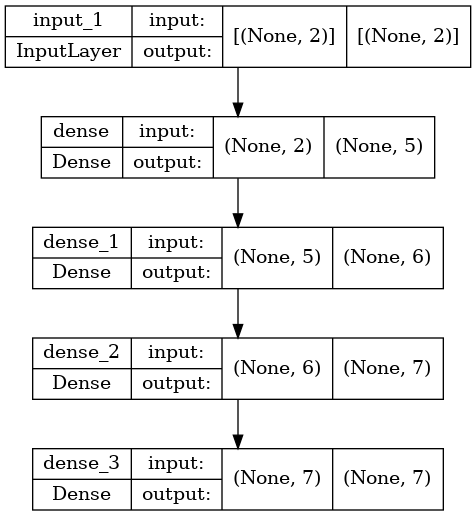

In [150]:
architecture_models = architecture_models[0]
architecture_models_dir_path = architecture_models[0]
path = os.path.join(project_dir_path, architecture_models_dir, f'{N}.png')
plot_model(model, to_file=path, show_shapes=True, show_layer_names=True)

In [151]:
class NeuralNetwork:
    def __init__(self, x, y, model):
        self.df_x = x
        self.df_y = y
        self.model = model
        self.from_ = 0
        self.to = 1
    
    def get_df_xy(self, from_ = None, to = None, xy = None):
        if xy is None:
            xy = 'x'
        
        if from_ is None:
            from_ = self.from_
        else:
            self.from_ = from_
            
        if to is None:
            to = self.to
        else:
            self.to = to
        
        if xy.lower() == 'x':   
            return self.df_x[from_:to]
        elif xy.lower() == 'y':   
            return self.df_y[from_:to]
    
    def predict(self):
        df_x = self.get_df_xy(self.from_, self.to)
        df_res = pd.DataFrame(self.model.predict(df_x.values))
        df_res.columns = self.df_y.columns
        df_res.index = df_x.index
        return df_res

### Дальше - было по аналогии с NeuralNetwork_8 // решил удалить